In [1]:
%load_ext autoreload
%autoreload 2
import sys
dirr = "../../src"
if dirr not in sys.path:
    sys.path.append(dirr)
import pandas as pd
import numpy as np
import numpy.random as npr
import utils as helper
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Q1
Link to the [pdf](https://drive.google.com/file/d/1YhLUJuHG-geJgn1pXUl7KHdrrjGvUgQr/view?usp=sharing)

---

# Q2
a) Solution by sk-learn

In [2]:
X = [[1, 2],
     [2, 4],
     [3, 6],
     [4, 8]]
y = [2,3,4,5]
X = np.array(X)
y = np.array(y)
# Setting up data

In [3]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [4]:
lr.predict([[2,4.4]])

array([3.16])

---
# Q2
b) Using normal Equations.

We get ``LinAlgError`` because the matrix $X.X^{T}$ is singular, therefore inverting such a matrix would fail.

In [5]:
from lregress import normalEquationRegression
theta = normalEquationRegression(X, y)
theta

LinAlgError: Singular matrix

Sk-learn overcomes this problem by using a different technique to calculate inverses, called [Moore–Penrose pseudo inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse).

---
# Q3
a) Running Sk-learn on real-estate price prediction problem.

In [6]:
data_loc = "../../data/real_estate/dataset.xlsx"
data = pd.read_excel(data_loc)
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]
tupl = train_test_split(X, y)
X_train, X_test, y_train, y_test = tupl
X_train.head(5)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
293,2012.666667,12.6,383.28050,7,24.96735,121.54464
342,2012.666667,5.7,90.45606,9,24.97433,121.54310
359,2013.500000,5.6,2408.99300,0,24.95505,121.55964
129,2013.416667,38.5,216.83290,7,24.98086,121.54162
320,2012.750000,13.5,4197.34900,0,24.93885,121.50383


In [7]:
def rmse(pred, true):
    return np.sqrt(np.mean((pred-true)**2))

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("The RMSE error obtained is: ", rmse(y_pred, y_test.values))

The RMSE error obtained is:  11.696318577304618


In [9]:
print(lr.coef_)
print(lr.intercept_)

[ 3.43741838e+00 -2.11267091e-01 -5.03394823e-03  1.02636124e+00
  2.08516242e+02 -6.01825915e+00]
-11352.67882132332


---
# Q3
b) To assume that the co-efficients learnt signify the importance of the feature is wrong. This can be shown by thinking of a example where on of the feature measures some quantities in ``centimeters`` and the same feature is converted to ``inches`` in the next curve fitting. Since we already know the importance of the feature would not change by the unit it is measured in but the co-efficients would get changed. Here by taking a feature in a different unit, the importance of the feature can be decreased (stated in the question) is a contradiction as clearly importance of a feature is not dependent on the unit it is measured. There for the coefficients don't tell us anything about the importance of the features.

In [10]:
coef_ = lr.coef_
print("The coeffs learnt are the following: ")
coef_

The coeffs learnt are the following: 


array([ 3.43741838e+00, -2.11267091e-01, -5.03394823e-03,  1.02636124e+00,
        2.08516242e+02, -6.01825915e+00])

---
# Q3
c) Scaling the numerical columns of the Data Frame.

In [11]:
# scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])
tupl = train_test_split(X, y)
X_train, X_test, y_train, y_test = tupl
X_train.head(3)

D:\Users\apoor\Miniconda3\envs\3d\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
126,0.454545,0.881279,0.120859,0.4,0.561197,0.660341
179,0.454545,0.319635,0.064268,0.1,0.519389,0.579793
390,0.909091,0.748858,0.054829,0.9,0.477945,0.754475


In [12]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
coef_ = lr.coef_
print("The coeffs learnt are the following: ")
coef_

The coeffs learnt are the following: 


array([  4.57301427, -13.32799336, -29.56999173,  11.28219219,
        20.02132496,  -2.16375828])

---
# Q3
c) Coefficients learnt on the normalized data may or may not correspond the importance of a feature. The case when the features are totally uncorrelated, in such a case the coefficients learnt would correspond to the improtance of the features. But when we have correlated features like height and weight (even after they are normalized) they are correlated and the coefficients learnt would not correspond to the the importance of the features. 

---
# Q3
d) Distribution of the residuals.

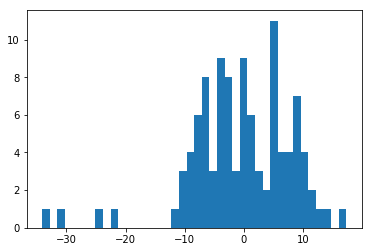

In [13]:
plt.hist(y_pred-y_test, bins=40);

The distribution is mostly centered at 0 with a look of a gaussian (Not sure if it should be, mathematically). We see a noisy sample in our data though, the point that has a error of nearly -75.

One thing that I feel is that if we remove the outlier, the data would be much better fitted. I am able to guess this as we know that our error function is Root Mean Squared, which takes the square of the error, and a larger error would have a much larger affect on our qudratic error function.

# Q3
e) 5 Cross-Validation for hyperparameter selection 

In [14]:
import itertools
from utils import make_folds

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from itertools import combinations

def nested_cross(master_data, outer=5, max_fea=None):
    dFull = master_data.copy()
    dTrain, dTest = train_test_split(dFull, test_size=0.3)
    kf = KFold(n_splits=outer, shuffle=True)
    saved_rmse = {}
    if max_fea == None:
        max_fea = len(dFull.columns) - 1

    for i, (ixTrain, ixVal) in enumerate(kf.split(dTrain)):
        fTrain, fVal = dTrain.iloc[ixTrain], dTrain.iloc[ixVal]
        for k in range(1, max_fea + 1):
            for j in (list(combinations(np.arange(len(dFull.columns)-1), k))):
                j = list(j)
                temp_fea = dTrain.columns[j]
                X_train_set = fTrain[list(temp_fea)]
                y_train_set = fTrain.iloc[:, -1]
                X_test_set = fVal[list(temp_fea)]
                y_test_set = fVal.iloc[:, -1]

                reg = LinearRegression().fit(X_train_set,
                                             y_train_set)
                y_pred = reg.predict(X_test_set)
                err = y_pred - y_test_set.values
                rms_err = np.sqrt(np.square(err).sum()/len(y_pred))

                # adding all the rms_errs for diff. fold combinations
                saved_rmse[tuple(j)] = saved_rmse.get(tuple(j),0) + rms_err

    # getting the best set of features, (min rms)
    best_feature = dTrain.columns[list(min(saved_rmse, key=saved_rmse.get))]
    print("Best Feature Set: {}".format(list(best_feature)))

    reg_org = LinearRegression().fit(dTrain.iloc[:, best_feature], dTrain.iloc[:, -1])
    y_pred = reg_org.predict(dTest.iloc[:, best_feature])
    err = y_pred - dTest.iloc[:, -1].values
    rms_err = np.sqrt(np.square(err).sum()/len(y_pred))
    print(rms_err)

    print("Complete Feature Set: {}".format(list(dTrain.columns)))
    reg_op = LinearRegression().fit(dTrain.iloc[:, :-1], dTrain.iloc[:, -1])
    y_pred = reg_op.predict(dTest.iloc[:, :-1])
    err = y_pred - dTest.iloc[:, -1].values
    rms_err = np.sqrt(np.square(err).sum()/len(y_pred))
    print(rms_err)

a) In this we check all the possible combinations and then select the model performing the best. This would take exponentail time as the poosible combinations of features is $2^m$.

In [16]:
master_data = pd.DataFrame(np.concatenate([X, y[:, None]], axis=1))
nested_cross(master_data)

Best Feature Set: [0, 1, 2, 3, 4]
8.446564236560112
Complete Feature Set: [0, 1, 2, 3, 4, 5, 6]
8.46338218443312


In [17]:
def nested_cross_fwd(master_data, outer=5, max_fea=None, tol=1):
    dFull = master_data.copy()
    dTrain, dTest = train_test_split(dFull, test_size=0.3)
    kf = KFold(n_splits=outer, shuffle=True)
    saved_fea = []
    best_rmse = 100000
    if max_fea == None:
        max_fea = len(dFull.columns) - 1

    for k in range(1, max_fea + 1):
        for i, (ixTrain, ixVal) in enumerate(kf.split(dTrain)):
            fTrain, fVal = dTrain.iloc[ixTrain], dTrain.iloc[ixVal]
            
            saved_rmse = {}
            for j in (list(combinations(np.arange(len(dFull.columns)-1), 1))):
                if j[0] in saved_fea:
                    continue
                j = list(j)
                temp_cols = saved_fea + j
                temp_fea = dTrain.columns[temp_cols]
                X_train_set = fTrain[list(temp_cols)]
                y_train_set = fTrain.iloc[:, -1]
                X_test_set = fVal[list(temp_cols)]
                y_test_set = fVal.iloc[:, -1]

                reg = LinearRegression().fit(X_train_set,
                                             y_train_set)
                y_pred = reg.predict(X_test_set)
                err = y_pred - y_test_set.values
                rms_err = np.sqrt(np.square(err).sum()/len(y_pred))

                # adding all the rms_errs for diff. fold combinations
                saved_rmse[tuple(temp_cols)] = saved_rmse.get(tuple(temp_cols),0) + rms_err

        bst_fea_till_now = list(min(saved_rmse, key=saved_rmse.get))
        curr_rmse = saved_rmse[tuple(bst_fea_till_now)]
        if (best_rmse > curr_rmse + tol):
            saved_fea = bst_fea_till_now
            best_rmse = curr_rmse
        else:
            break

    # getting the best set of features, (min rms)
    best_feature = dTrain.columns[list(min(saved_rmse, key=saved_rmse.get))]
    print("Best Feature Set: {}".format(list(best_feature)))

    reg_org = LinearRegression().fit(dTrain.iloc[:, best_feature], dTrain.iloc[:, -1])
    y_pred = reg_org.predict(dTest.iloc[:, best_feature])
    err = y_pred - dTest.iloc[:, -1].values
    rms_err = np.sqrt(np.square(err).sum()/len(y_pred))
    print(rms_err)

    print("Complete Feature Set: {}".format(list(dTrain.columns)))
    reg_op = LinearRegression().fit(dTrain.iloc[:, :-1], dTrain.iloc[:, -1])
    y_pred = reg_op.predict(dTest.iloc[:, :-1])
    err = y_pred - dTest.iloc[:, -1].values
    rms_err = np.sqrt(np.square(err).sum()/len(y_pred))
    print(rms_err)

The result of learning by sequential forward selection. We used a ``tol`` of ``1`` here, therefore a increase of 1 in rmse is required to move on and add a new feature to the selected feature set. 

In [18]:
master_data = pd.DataFrame(np.concatenate([X, y[:, None]], axis=1))
nested_cross_fwd(master_data, tol=1)

Best Feature Set: [2, 0, 3, 1]
8.644996966526852
Complete Feature Set: [0, 1, 2, 3, 4, 5, 6]
8.175143356303172


First, an inner cross validation is used to tune the parameters and select the best model. Second, an outer cross validation is used to evaluate the model selected by the inner cross validation.

-- [ref](https://chrisalbon.com/machine_learning/model_evaluation/nested_cross_validation/)

---
# Q4
[Link](https://gist.github.com/k0pch4/4ae7c4929558cfa2c54c9517466b03e6#file-lregress-py) to all the functions below.

a) ``normalEquationRegression(X, y)`` takes in ``X`` and ``y`` and returns a vector ``Theta=[theta0, ..., thetad]`` of dimention 1 more than the number of features in ``X``.

b) ``gradientDescentRegression(X, y, alpha=0.001, it=1000)`` uses iterative gradient descent to find the optimal ``Theta``. Returns, a vector ``Theta=[theta0, ..., thetad]``.



c) ``gradientDescentAutogradRegression(X, y, alpha=0.001, it=1000)`` uses `Autograd` library to directly calculate the gradients, therefore we are not requried to calculate them by hand. Returns ``Theta``.

d) ``gradientDescentPytorchRegression(X, y, alpha=0.001, it=1000)`` uses `Autograd` internally to directly calculate the gradients, therefore we are not requried to calculate them by hand. Returns ``Theta``.

e) Below are the differnt demos for all of the implementations.

In [19]:
from lregress import normalEquationRegression
from lregress import gradientDescentRegression
from lregress import gradientDescentAutogradRegression
from lregress import gradientDescentPytorchRegression

In [20]:
th = normalEquationRegression(X_train, y_train)
print ("normalEquationRegression theta:\n", th)

th = gradientDescentRegression(X_train, y_train)
print ("gradientDescentRegression theta:\n", th)

th = gradientDescentAutogradRegression(X_train, y_train)
print ("gradientDescentAutogradRegression theta:\n", th)

th = gradientDescentPytorchRegression(X_train, y_train)
print ("gradientDescentPytorchRegression theta:\n", th)

normalEquationRegression theta:
 [ 33.48702976   4.57301427 -13.32799336 -29.56999173  11.28219219
  20.02132496  -2.16375828]
gradientDescentRegression theta:
 [ 31.70589168   4.51558614 -13.30162636 -27.73592744  11.50184113
  20.73299458  -0.49494629]
gradientDescentAutogradRegression theta:
 [ 31.70589168   4.51558614 -13.30162636 -27.73592744  11.50184113
  20.73299458  -0.49494629]
gradientDescentPytorchRegression theta:
 [ 31.6799       4.514747   -13.301242   -27.709167    11.505039
  20.743425    -0.47061765]


---
# Q5
We see that we are not able to get a descent fit, i.e. the coefficients are way off from the true coefficients. The main reason for this is that we are using a really huge noise to generate a data, nearly of the order $10^5$. This amount of noise is not able to be ignored by the polynomial regression that we are trying to fit to the data.
If we reduce the noise we would be much more sucessful to fit the model and get better results.

In [21]:
def transformed(x, y, p = 5):
    X = []
    for i in range(1, p+1):
        X.append(np.power(x, i))
    X = np.array(X).T
    return normalEquationRegression(X, y)

In [22]:
# Generating some data
x = np.arange(0, 20.1, 0.1)
np.random.seed(0)
y = 1*x**5 + 3*x**4 - 100*x**3 + \
    8*x**2 -300*x - 1e5 + \
    np.random.randn(len(x))*1e5

In [23]:
transformed(x, y)

array([ 8.82345685e+03, -5.75536517e+04,  3.57964583e+03,  7.53760679e+02,
       -9.47499055e+01,  3.65204554e+00])

---
# Q6

In [49]:
# building a toy problem
X = [[1, 3, 6]]
Y = [6, 10, 16]
X = np.array(X).T
Y = np.array(Y)

In [77]:
def cost(th0, th1, x, y):
    summ = 0
    for i in range(len(x)):
        summ += (y[i] - th0 - th1*x[i])**2
    return summ

def plot(it=300):
    delta = 0.01
    th_0 = np.linspace(-30.0, 30.0, 25)
    th_1 = np.linspace(-10.0, 10.0, 25)
    Th_0, Th_1 = np.meshgrid(th_0, th_1)
    Z = cost(Th_0, Th_1, X, Y)
    plt.contour(Th_0, Th_1, Z, 50);
    for i in range(it):
        th = gradientDescentRegression(X, Y, alpha=0.003, it=i)
        plt.scatter((th[0]), (th[1]), color='black')
    plt.scatter((4), (2)) # the correct values of theta

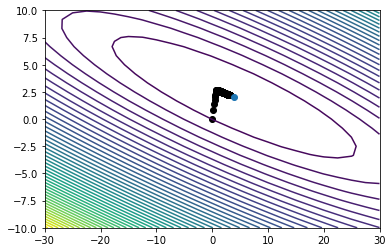

In [78]:
plot()

Black dots signify the gradient descent happening.

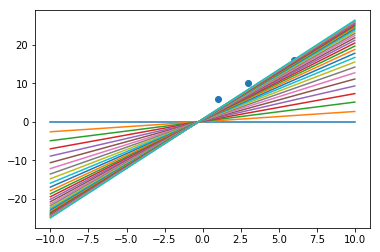

In [63]:
it = 30
for i in range(it):
    th = gradientDescentRegression(X, Y, alpha=0.001, it=i)
    x = np.linspace(-10, 10, 20)
    yhat = th[0] + th[1] * x
    plt.plot(x, yhat);
plt.scatter(X, Y)

The colored lines denote the movement of the line and the corresponding changes in the ``theta``.